In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.data_loader.DataLoader import DataLoader
from src.eval import (eval_adam, eval_iwls, eval_lda, eval_qda,
                      eval_random_forest, eval_sgd, eval_tree)

sns.set_theme(rc={'figure.figsize':(8,6)})

In [2]:
random_states = [420, 69, 42, 24, 96, 1312, 777]

In [35]:
loader = DataLoader(product=False)

results = pd.DataFrame()

for dataset in loader.get_supported_datasets():
    for random_state in random_states:
        result = {}
        # IWLS
        result['dataset'] = dataset
        result['random_state'] = random_state
        result['method'] = 'IWLS'
        result['loglik'] = eval_iwls(loader, dataset, random_state, max_iterations=500, patience=5)[1]
        results = pd.concat([results, pd.DataFrame.from_records([result])], ignore_index=True)
        
        # SGD
        result['method'] = 'SGD'
        result['loglik'] = eval_sgd(loader, dataset, random_state, max_iterations=500, patience=5, batch_size=100)[1]
        results = pd.concat([results, pd.DataFrame.from_records([result])], ignore_index=True)

        # ADAM
        result['method'] = 'ADAM'
        result['loglik'] = eval_adam(loader, dataset, random_state, max_iterations=500, patience=5, batch_size=100)[1]
        results = pd.concat([results, pd.DataFrame.from_records([result])], ignore_index=True)

results

,dataset,random_state,method,loglik
0,banknote,420,IWLS,"[3.501848153900158, 3.5498186765844713, 3.5258..."
1,banknote,420,SGD,"[3.5498186764982833, 3.5498186764982833, 3.501..."
2,banknote,420,ADAM,"[3.357936586278158, 3.309966063507657, 3.54981..."
3,banknote,69,IWLS,"[3.2140250177942793, 3.1900397565814047, 3.190..."
4,banknote,69,SGD,"[4.029523904634233, 3.6457597222116607, 3.6937..."
...,...,...,...,...
184,pc1,1312,SGD,"[8.51600411696829, 9.287488811365204, 8.367641..."
185,pc1,1312,ADAM,"[15.726418753135313, 15.607728800635083, 16.40..."
186,pc1,777,IWLS,"[6.913689753363772, 6.824672288855319, 6.85434..."
187,pc1,777,SGD,"[8.337969188271257, 11.097510590272423, 16.052..."


In [37]:
results.to_pickle('convergence_performance.pkl')

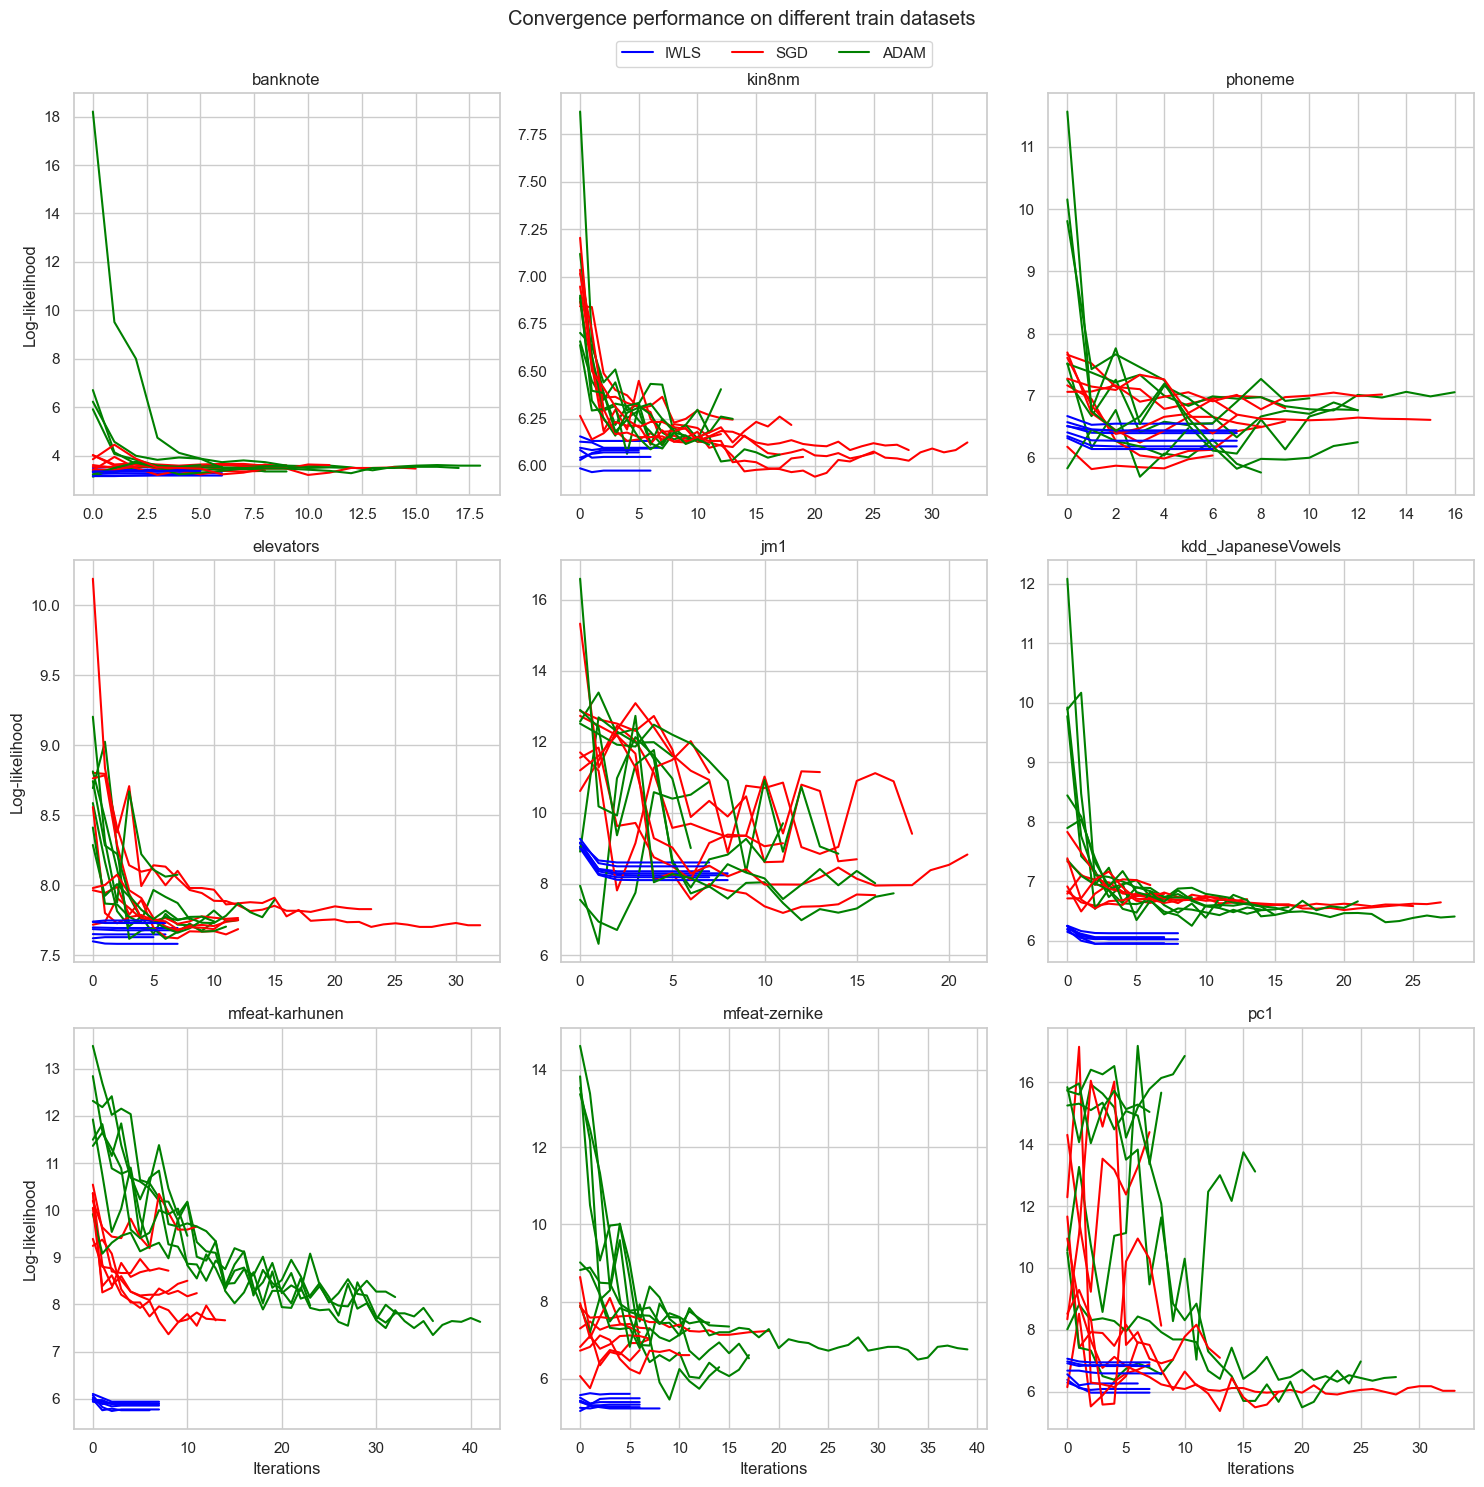

In [36]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Convergence performance on different train datasets', y=.99)
for i, dataset in enumerate(loader.get_supported_datasets()):
    res = results[results['dataset'] == dataset]
    for j, row in res.iterrows():
        axes[i//3, i%3].plot(row['loglik'], color=colors[row['method']])
    if i//3 == 0 and i%3 == 1:
        axes[i//3, i%3].legend(['IWLS', 'SGD', 'ADAM'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    if i//3 == 2:
        axes[i//3, i%3].set_xlabel('Iterations')
    if i%3 == 0:
        axes[i//3, i%3].set_ylabel('Log-likelihood')
    axes[i//3, i%3].set_title(dataset)

plt.tight_layout()
plt.show()